In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import optimization_SPDC as opt
import optimization_SPDC_gaussain_pump as gauss_opt
import jax.scipy.optimize as jax_opt

key = jax.random.PRNGKey(0)
np.random.seed(0)

# Get Schmidt number and JSA for low gain no optimization

In [2]:
Np = 0.009444
# create the frequency matrix ω-ω_mean 
N = 701
wi = -6
wf = 6
x = np.linspace(wi, wf, N)
# get the group velocities for all modes
vp = 0.1
sigma = 1
a = 1.61/1.13
l = 1
def symmetric_v(vp, sigma, l, a):
    vi = vp / (1 - 2 * a * vp / (l * sigma))
    vs = vp / (1 + 2 * a * vp / (l * sigma))
    return vs, vi
vs, vi = symmetric_v(vp, sigma, l, a)
# prefactor to multiply pump with to obtain F matrix (change Np[i] to see different values of N)
alpha = np.sqrt(Np)*(x[len(x) - 1] - x[0])/(len(x) - 1)/(np.sqrt(2 * np.pi * vs * vi * vp))
# initialize the G and H matrices without cross phase modulation
G = np.diag((1/vs - 1/vp)*x)
H = np.diag((1/vi - 1/vp)*x)
w = np.linspace(2*wi, 2*wf, 2*N)
# width is ideal value for low gain (1.61/(1.13*kappa) with kappa being width of sinc PMF (see Design considerations for high-purity heralded single-photon sources by Graffitti et al.))
width = jnp.sqrt(1.61/(1.13*l*(1/vp - 1/vi)))
theta = [1., width, 0.1]

In [3]:
Np = 0.009444#np.array([0.00003558, 0.002581, 0.005297, 0.009444])

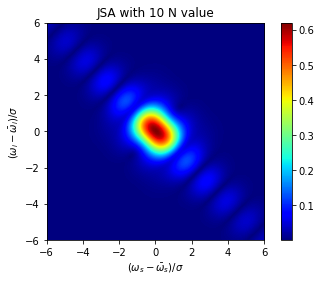

(DeviceArray(10.000414, dtype=float32), DeviceArray(1.0590571, dtype=float32))

In [4]:
JSA = gauss_opt.get_JSA(theta, w, alpha, G, H, l)
fig, ax = plt.subplots()
im = ax.imshow(JSA, cmap="jet", origin="lower",extent=[x[0],x[N-1],x[0],x[N-1]])
ax.set_title("JSA with 10 N value")
ax.set_xlabel(r"$(\omega_{s}-\bar{\omega}_{s})/\sigma$")
ax.set_ylabel(r"$(\omega_{i}-\bar{\omega}_{i})/\sigma$")
plt.colorbar(im, orientation="vertical")
#plt.savefig("low_pump_10_N.pdf")
plt.show()
gauss_opt.get_observable(theta, w, alpha, G, H, l)

In [83]:
K = []
for i in range(len(Np)):
    alpha = np.sqrt(Np[i])*(x[len(x) - 1] - x[0])/(len(x) - 1)/(np.sqrt(2 * np.pi * vs * vi * vp))
    K.append(float(gauss_opt.get_observable(theta, w, alpha, G, H, l)[1]))

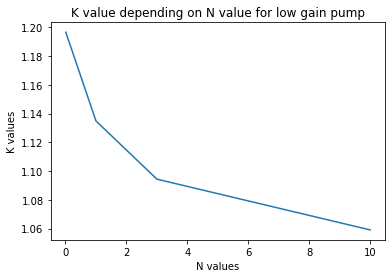

In [90]:
plt.title("K value depending on N value for low gain pump")
plt.xlabel("N values")
plt.ylabel("K values")
plt.plot(np.array([0.01, 1, 3, 10]),K)
plt.savefig("plots\K_on_N_low_gain.pdf")